In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# load the datast
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.csv")

In [3]:
#cheking the top of the datase
df=dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#confirming if the dataset has atleats 15k rows
df.shape

(48842, 15)

In [5]:
#checking for missing values, nuber of missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [6]:
#any misiing values at all
df.isnull().values.any()


np.False_

In [7]:
#checking all the available columns
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
#selcting the features(the input values/X)
selected_features=["age","educational-num","capital-gain","capital-loss","hours-per-week","workclass","education","marital-status","occupation","relationship","gender","race"]

In [9]:
#picking out my slected input featres from the dataset
X=df[selected_features]



In [10]:
#my target value(Y/output)
df["income"].value_counts()


,count
income,
<=50K,37155
>50K,11687


In [11]:
#ectraction off features and target, al

df["income"] = df["income"].str.strip()
#mapping our binary values to 0 if income is less than or eqaul to 50k , then 1 if its greater than 50k
df["income"] = df["income"].map({
    "<=50K": 0,
    ">50K": 1
})


In [12]:
#target variable/output
y=df["income"]

In [13]:
#checking the top of the input values
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,gender,race
0,25,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,Black
1,38,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,White
2,28,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,White
3,44,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,Black
4,18,10,0,0,30,?,Some-college,Never-married,?,Own-child,Female,White


In [14]:
#sort of confirming if the mapping worked
y.value_counts()

,count
income,
0,37155
1,11687


**Generate 10,000 parameter sets**

In [15]:
import torch #using this lib for tensors


In [16]:
#countinh the features
num_features=X.shape[1]
num_features

12

In [17]:
#encoding cat columns
X_encoded = pd.get_dummies(X, drop_first=True)


In [18]:
X_encoded = X_encoded.astype(float)
#making the cat columns numericall

In [19]:
X_tensor = torch.tensor(X_encoded.values, dtype=torch.float32) # tensor for the x values

In [20]:
y = y.astype(float)


In [21]:
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1) #tensor for our target values


In [22]:
y.unique() #chexking our y values to confirm if they indeed contain wht we expect



array([0., 1.])

In [23]:
y.dtype


dtype('float64')

In [24]:
y_tensor.shape #remembring that the datset actullay has 48k values not the 15k that the question

torch.Size([48842, 1])

In [25]:
df["income"].value_counts()


,count
income,
0,37155
1,11687


In [26]:
df_15k = df.sample(n=15000, random_state=42) #picking / creating a sample from the 48k items , a sample that has exactly 15k


In [27]:
df_15k.to_csv("adult_income_15k.csv", index=False) #conerting the 15 rows to a csv file


In [28]:
X = df_15k[selected_features]
y = df_15k["income"].astype(float)

X_encoded = pd.get_dummies(X, drop_first=True).astype(float)

X_tensor = torch.tensor(X_encoded.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

#repeating the porocess i did when the data was 48k onto the sample of 15k


In [29]:
# extract the number of input features from the feature tensor to corectly initialize the models parameter
num_features = X_tensor.shape[1]
num_features


58

In [30]:
#the number of models will be usingdataset created from random weights)
num_models = 10000

In [31]:
# we put on random weights for each model
weights = torch.randn(num_models, num_features)

# random bias for each modeln (this is litekally the +b in objective funtion)
bias = torch.randn(num_models, 1)


In [32]:
parameters_tensor = torch.cat([weights, bias], dim=1)
# concatenating weights and bias to fom a complete parameter set for each model

In [33]:
parameters_tensor.shape


torch.Size([10000, 59])

In [34]:
#creating column names which corespond to each feature weight and bias
column_names = list(X_encoded.columns) + ["bias"]

#convet the tensor we created previously into a dtaframe
parameters_df = pd.DataFrame(
    parameters_tensor.numpy(),
    columns=column_names
)

#saving the parameters  we have into a csv file
parameters_df.to_csv("linear_model_parameters_10000.csv", index=False)

In [35]:
parameters_df.shape



(10000, 59)

In [36]:
parameters_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,bias
0,-0.728429,-1.734842,1.972192,-0.779133,0.080292,0.269764,-0.901249,0.039606,1.053623,-1.646009,...,-0.553632,0.282535,0.205584,-0.063865,0.219029,-0.384955,-1.755263,-0.398657,0.926444,0.025166
1,1.651129,0.812231,0.305952,1.013420,0.586691,0.173042,1.257043,0.169767,-0.074031,0.269697,...,1.151910,-0.040246,1.595672,0.638585,0.523237,-0.284194,-0.377218,0.915182,0.320023,0.025227
2,0.948623,1.951978,-0.252458,0.911726,0.175232,0.952192,1.789970,2.804751,-0.342942,-1.625163,...,-0.576165,-0.085698,0.778302,-2.439902,0.512308,0.925490,0.591305,-1.857543,0.362105,-0.854380
3,0.681899,-0.393912,-2.046564,-0.383606,0.767008,-0.706692,-0.230469,0.560228,-0.151802,0.062003,...,-0.746450,-2.295130,1.217013,0.942367,-0.664152,0.572830,0.205780,-1.099289,-0.621647,1.862446
4,0.935493,-0.203324,-0.127364,1.298491,-1.252234,1.051114,-0.836204,-0.031261,1.615765,0.434533,...,-0.498847,-2.461809,-0.186417,0.648388,-0.240711,-0.729556,-0.837276,0.557939,1.099584,-0.204792


In [37]:
#using sigmid for probability mapping of our linear models
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [38]:
#definign our loss funxtion in which in this case we go with log loss
def lossFunction(X, y, weights, bias):
    # our linear model
    z = X @ weights + bias

    # applign sigmoid to get propabilities
    y_hat = sigmoid(z)

    # for numerical stability
    epsilon = 1e-7
    y_hat = torch.clamp(y_hat, epsilon, 1 - epsilon)

    # binary loss calculation/computation
    loss = -torch.mean(
        y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)
    )

    return loss


In [39]:
#here we find the best parameters
def findBestParams(X, y, params_csv_path):


    # loading our parameter sets
    params_df = pd.read_csv(params_csv_path)

    # convert to tensor
    params_tensor = torch.tensor(
        params_df.values, dtype=torch.float32
    )

    num_params = params_tensor.shape[0]
    num_features = X.shape[1]

    best_loss = float("inf")
    best_weights = None
    best_bias = None

    # evaluate each parameter sat
    for i in range(num_params):
        weights = params_tensor[i, :num_features].view(-1, 1)
        bias = params_tensor[i, num_features]

        loss = lossFunction(X, y, weights, bias)

        if loss.item() < best_loss:
            best_loss = loss.item()
            best_weights = weights
            best_bias = bias

    return best_weights, best_bias, best_loss

In [40]:
#a mini test to see if the previously defined functions actullay work
best_w, best_b, best_loss = findBestParams(
    X_tensor,
    y_tensor,
    "linear_model_parameters_10000.csv"
)

best_loss


1.515997052192688

In [41]:
from sklearn.model_selection import train_test_split

#splitting the dataset into testing and training set to be able to evaluate our models
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)
#20% od the data is for testing, then 80% is for traiining


In [42]:
#evaulting the set of parametrs to see which ones give us the least loss
def evaluateParams(X_train, y_train, X_test, y_test, params_csv_path):
    #loading the param sets from csv file
    params_df = pd.read_csv(params_csv_path)
    params_tensor = torch.tensor(params_df.values, dtype=torch.float32)

    num_models = params_tensor.shape[0]
    num_features = X_train.shape[1]

    results = []

#computing the loss for each param sets on both the test and train set
    for i in range(num_models):
        weights = params_tensor[i, :num_features].view(-1, 1)
        bias = params_tensor[i, num_features]

        train_loss = lossFunction(X_train, y_train, weights, bias).item()
        test_loss = lossFunction(X_test, y_test, weights, bias).item()

        results.append({
            "model_id": i,
            "train_loss": train_loss,
            "test_loss": test_loss
        })

    return pd.DataFrame(results)#perfomance of all eavulated models


In [43]:
results_df = evaluateParams(
    X_train, y_train, X_test, y_test,
    "linear_model_parameters_10000.csv"
)
#creating a dataframe with the evaulation results

In [44]:
#displaying our top 5
top_5 = results_df.sort_values(
    by=["test_loss", "train_loss"]
).head(5)

top_5

,model_id,train_loss,test_loss
2478,2478,1.520011,1.499940
4880,4880,1.578725,1.543507
5293,5293,1.619817,1.545125
1136,1136,1.743700,1.660388
7469,7469,1.775178,1.674127


In [45]:
params_df = pd.read_csv("linear_model_parameters_10000.csv")

top_5_params = params_df.loc[top_5["model_id"]]
top_5_params


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,bias
2478,-0.002810,-0.169183,1.491926,0.793715,0.002243,0.137763,-0.185687,1.205193,1.322412,1.436723,...,-0.991882,-0.577820,0.309990,0.619552,0.091055,-1.457352,-0.251179,1.840738,0.107332,0.802386
4880,0.014762,-0.425717,0.353949,1.351602,0.035673,-1.112269,-1.266614,-0.796172,-1.107650,0.036966,...,0.889308,0.206612,-0.806009,0.164706,0.561548,-0.638873,0.524975,-0.059703,-1.079502,0.553084
5293,0.006704,0.285322,1.264940,1.458961,-0.206118,0.399317,-0.701558,-0.016656,1.096758,0.452347,...,-1.117118,-1.385615,-0.107808,-0.689338,-0.040750,-1.028727,-0.534569,0.580737,3.309324,-1.096553
1136,-0.013456,0.190995,1.153547,0.210472,-0.194010,-0.855519,0.210288,0.270655,2.466754,-0.850548,...,-0.578191,-0.113070,0.560164,-0.897274,-0.845317,0.104813,0.046380,-2.038603,1.175690,0.724875
7469,-0.016430,0.621401,0.140981,0.114303,-0.223795,-0.989431,-1.183827,0.340598,0.621595,1.609054,...,0.479566,0.660096,-0.508326,-0.603271,0.122692,-1.105892,-1.159288,1.620662,0.528061,0.174950


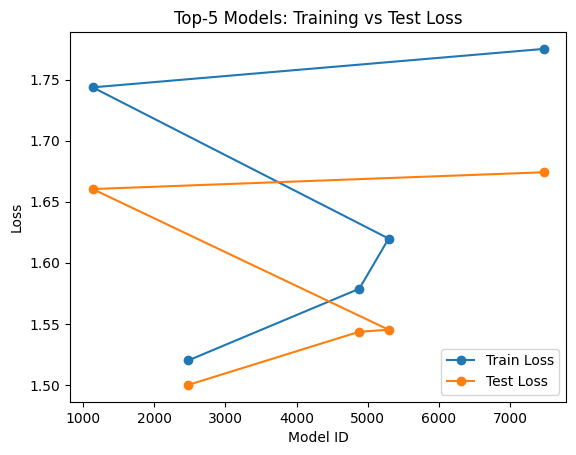

In [46]:
#visualizing the top 5 models
import matplotlib.pyplot as plt

plt.figure()
plt.plot(top_5["model_id"], top_5["train_loss"], label="Train Loss", marker="o")
plt.plot(top_5["model_id"], top_5["test_loss"], label="Test Loss", marker="o")
plt.xlabel("Model ID")
plt.ylabel("Loss")
plt.title("Top-5 Models: Training vs Test Loss")
plt.legend()
plt.show()


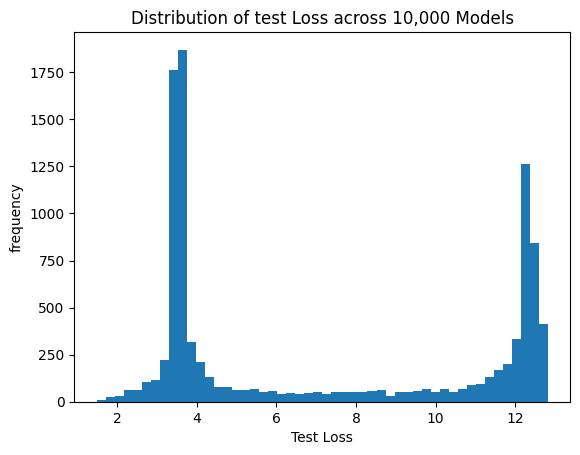

In [47]:
plt.figure()
plt.hist(results_df["test_loss"], bins=50)
plt.xlabel("Test Loss")
plt.ylabel("frequency")
plt.title("Distribution of test Loss across 10,000 Models")
plt.show()


In [48]:
params_df = pd.read_csv("linear_model_parameters_10000.csv")

# use only the first 1000 models ( as per the latter part of the questions)
params_df = params_df.iloc[:1000]


In [49]:
params_tensor = torch.tensor(
    params_df.values, dtype=torch.float32
)

num_models = params_tensor.shape[0]
num_features = X_train.shape[1]

In [50]:
results = []

for i in range(num_models):
    weights = params_tensor[i, :num_features].view(-1, 1)
    bias = params_tensor[i, num_features]

    train_loss = lossFunction(X_train, y_train, weights, bias).item()
    test_loss = lossFunction(X_test, y_test, weights, bias).item()

    results.append({
        "model_id": i,
        "train_loss": train_loss,
        "test_loss": test_loss
    })
#repating a few steps we took for the 10k models for the 1k models

In [51]:
performance_df = pd.DataFrame(results)


In [52]:
performance_df = performance_df.sort_values(
    by=["test_loss", "train_loss"],
    ascending=True
)


In [53]:
performance_df.to_csv(
    "model_performance_train_test_1000.csv",
    index=False
)
#saving the csv file with the 1k models